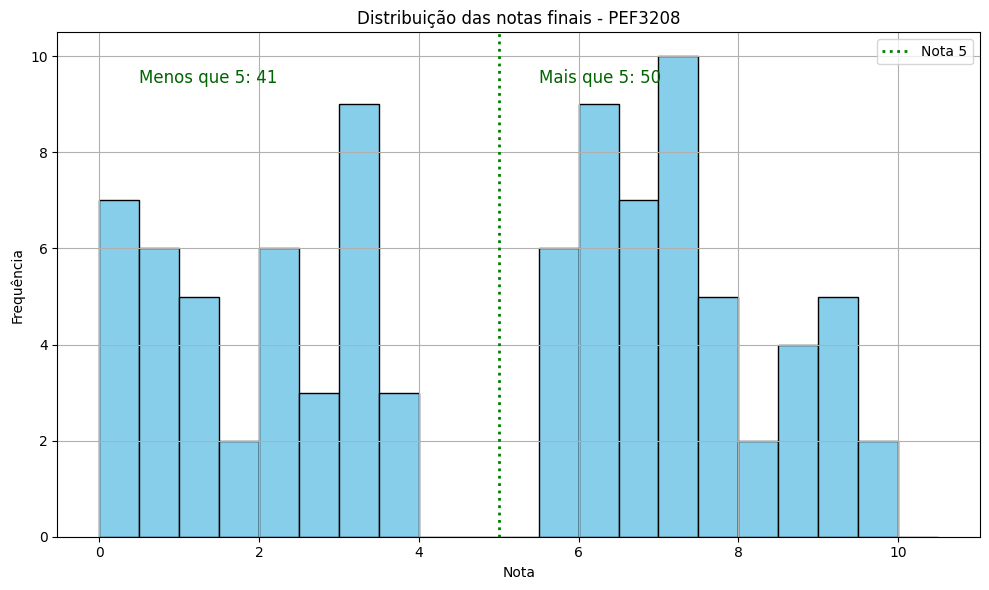

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Texto extraído da busca
text = """
Alexandre Harboe Azevedo 7,3 5,0 12,3 9,0 7,1
Alexys Vives Bernardino Alves 8,5 5,7 14,2 7,5 7,2
Alice Davidoff Cracasso 5,0 5,7 10,7 8,0 6,2
Alvaro Primitz 8,0 3,5 11,5 9,0 6,8
Ana Cecilia Paiva Aguiar 2,2 3,7 5,9 3,0
Ana Luiza Vieira Custodio 1,3 2,7 4,0 2,0
Andre Akira Horigoshi Maximino 7,2 6,5 13,7 10,0 7,9
Arthur Coelho Carvalho 0,5 0,0 0,5 0,3
Arthur da Silva Oliveira 0,5 0,5 0,3
Arthur da Silva Pereira 1,0 0,2 1,2 0,6
Arthur Miguellone Lucio Martins 4,0 7,0 11,0 9,0 6,7
Brenno Egidio Alves dos Santos 1,8 1,8 0,9
Bruna Reno Goulart 10,0 9,0 19,0 9,0 9,3
Bruno Henrique Trevisan 1,5 0,2 1,7 0,9
Bruno Rafael da Silva 0,5 0,0 0,5 0,3
Carlos Eduardo Ventura Tavares 9,5 9,0 18,5 10,0 9,5
Carlos Fabricio Marcolino Junior 2,3 2,7 5,0 2,5
Carolina Britto Haddad 7,8 6,5 14,3 9,0 7,8
Dan Kiyochi Shoji 1,5 7,0 8,5 8,0 5,5
Daniel Brunoro Krohling 7,5 7,2 14,7 9,0 7,9
Daniel Yudi Cavanha Ashikaga 7,5 6,8 14,3 10,0 8,1
Diego Fontes de Avila 7,5 8,2 15,7 10,0 8,6
Eduardo Albarello 3,0 4,5 7,5 3,8
Eduardo Gobbi Jorge 3,5 8,5 12,0 10,0 7,3
Eduardo Gonzalez Silva 0,5 5,0 5,5 3,0
Eduardo Rodrigues Leal 3,3 1,0 4,3 2,2
Enzo Costa Bizinoto 5,0 5,5 10,5 10,0 6,8
Felipe Dutra Bernardo 7,0 10,0 17,0 10,0 9,0
Felipe Labrego Argolo 6,8 8,8 15,6 10,0 8,5
Felipe Nunes Caixeta e Silva 2,5 2,2 4,7 2,4
Fernando Mendes Seraco 3,0 1,0 4,0 2,0
Fernando Santana Batista 4,8 4,0 8,8 9,0 5,9
Fernando Tadeu Ivanov Munhoz 10,0 6,2 16,2 7,5 7,9
Gabriel Agra de Castro Motta 1,3 1,5 2,8 1,4
Gabriel Alves Gaudio 5,5 3,8 9,3 9,0 6,1
Gabriel de Souza Silva 2,0 3,0 5,0 2,5
Gabriel Ishicava Caleffi 5,8 5,5 11,3 10,0 7,1
Gabriel Lopes Prodossimo 10,0 8,0 18,0 10,0 9,3
Gabriel Teles da Cunha 1,3 1,0 2,3 1,2
Guilherme Tokio Kawahara 7,5 6,3 13,8 7,5 7,1
Gustavo Generoso Guerra 4,0 4,0 8,0 10,0 6,0
Gustavo Rodrigues Barbeiro 4,0 4,8 8,8 8,5 5,8
Gustavo Santana da Silva 2,5 3,5 6,0 3,0
Henrique Inacio Cordeiro 8,0 4,0 12,0 10,0 7,3
Henrique Mantovan Carvalho 4,5 2,8 7,3 3,7
Hugo Louzada Oliveira Silva 0,5 0,5 0,3
Igor Ramos Dionisio 2,5 2,5 1,3
Ivens Viana de Moura 1,0 1,0 0,5
Izael Souza Oliveira 0,5 0,5 0,3
Joao Gustavo Teodozo Nunes 0,5 0,0 0,5 0,3
Joao Padovani Gonzaga 9,0 8,8 17,8 10,0 9,3
Joao Pedro Vakimoto 2,0 1,7 3,7 1,9
Joao Victor Costa Teodoro 2,0 6,7 8,7 10,0 6,2
Joao Vitor Monteiro da Silva 2,8 2,3 5,1 3,0
Jorge Miguel Cordeiro de Oliveira 3,0 8,0 11,0 8,0 6,3
Jorge Silas Dantas da Silva Goncalves 4,5 1,8 6,3 3,2
Julia Machado Boschetti 6,0 7,0 13,0 8,0 7,0
Karen Lumy Ikefuti Morishigue 2,2 0,5 2,7 1,4
Karolina Vasconcellos Barreto 9,5 6,8 16,3 9,0 8,4
Kaue de Paula Sateles 5,8 1,0 6,8 3,4
Lara de Almeida Furlan 1,0 3,0 4,0 2,0
Leonardo Moura Figueiredo da Silva 7,0 4,3 11,3 7,5 6,3
Lilian Thauane Laurindo 2,0 4,5 6,5 3,3
Lucas Lazzarini Aglio 4,0 6,2 10,2 10,0 6,7
Lucas Martins Libanio 9,3 8,7 18,0 7,5 8,5
Luis Eduardo Fasano 5,8 4,8 10,6 10,0 6,9
Marcelo Olivetti Franca Neri de Almeida 6,5 5,5 12,0 10,0 7,3
Maria Eduarda Araujo Silva 0,5 0,2 0,7 0,4
Maria Eduarda Dantas Leite Pessoa 8,3 2,2 10,5 10,0 6,8
Maria Eduarda Suehiro Patrocinio 1,0 1,0 0,5
Mateus Silva de Araujo 1,8 3,2 5,0 2,5
Matheus Davi Leao 4,5 4,8 9,3 10,0 6,4
Murilo Gueler Machado 4,0 4,0 8,0 9,0 5,7
Nickolas Demarchi 4,8 4,5 9,3 10,0 6,4
Paulo Henrique Bogalhao Pastorelli 5,0 4,2 9,2 9,0 6,1
Pedro de Oliveira Sousa 8,5 8,0 16,5 9,0 8,5
Pedro Filipe Geraldo de Faria 5,3 4,0 9,3 7,5 5,6
Pedro Origuela Porto 5,0 5,0 10,0 10,0 6,7
Rafael Dantas Mendonca Carnauskas 2,5 4,4 6,9 3,5
Rafael de Oliveira Thomaz 2,5 0,7 3,2 1,6
Rafael Romanello Rezende 4,0 7,0 11,0 10,0 7,0
Renan Gleuber de Brito Estevao 1,5 4,1 5,6 3,0
Rodrigo Almeida Sena 0,5 1,0 1,5 0,8
Sophia Soares Mariano 4,5 7,3 11,8 10,0 7,3
Talita da Silva Martins 2,0 2,0 1,0
Thiago Gomes Aveiro 9,5 9,0 18,5 10,0 9,5
Thiago Martins de Andrade Machado 5,5 7,2 12,7 10,0 7,6
Tiago Jose da Silva 2,5 6,3 8,8 8,5 5,8
Victor Grandolfo Mendes 8,9 8,8 17,7 10,0 9,2
Vinicius Akira Durante Tahara 3,0 2,2 5,2 3,0
Willian Hilquias da Silva 2,0 2,7 4,7 2,4
"""

# Extraindo apenas as notas_finais finais (último número de cada linha)
notas_finais = []
for linha in text.strip().split("\n"):
    if linha.strip():
        # Encontra todos os números decimais na linha
        numeros = re.findall(r"\d+,\d+", linha)
        if numeros:
            # Pega o último número (nota final) e converte para float
            nota_final = float(numeros[-1].replace(",", "."))
            notas_finais.append(nota_final)

# Contando quantos alunos tiraram menos e mais do que 5
menos_que_5 = sum(nota <= 5 for nota in notas_finais)
mais_que_5 = sum(nota > 5 for nota in notas_finais)

# Replotando o gráfico com a linha no 4
plt.figure(figsize=(10, 6))
plt.hist(
    notas_finais, bins=list(np.arange(0, 11, 0.5)), edgecolor="black", color="skyblue"
)
plt.axvline(5, color="green", linestyle="dotted", linewidth=2, label="Nota 5")

# Adicionando os textos com as quantidades
plt.text(
    0.5,
    plt.ylim()[1] * 0.9,
    f"Menos que 5: {menos_que_5}",
    fontsize=12,
    color="darkgreen",
)
plt.text(
    5.5,
    plt.ylim()[1] * 0.9,
    f"Mais que 5: {mais_que_5}",
    fontsize=12,
    color="darkgreen",
)

plt.title("Distribuição das notas finais - PEF3208")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

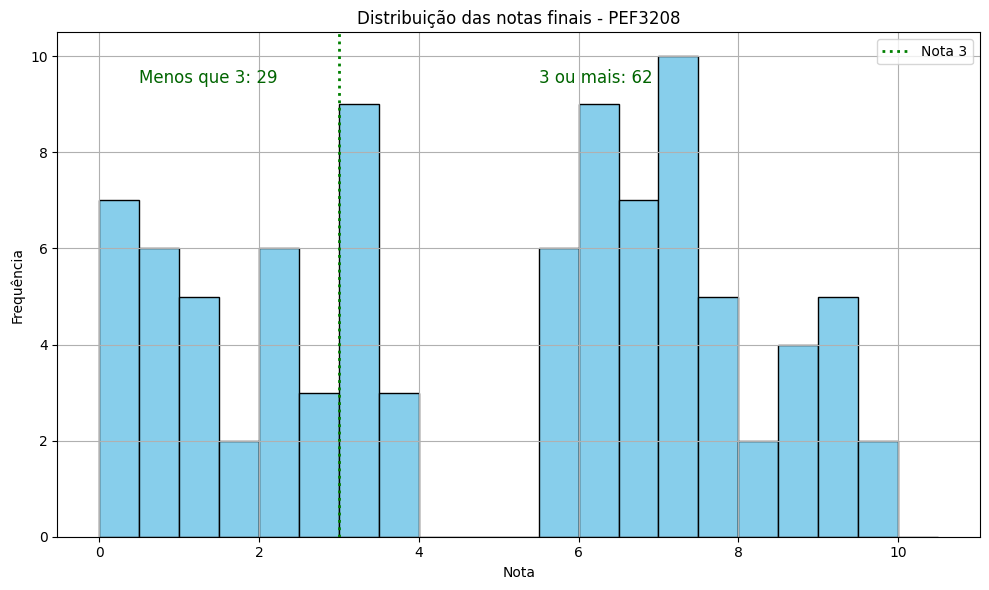

In [102]:
# Contando quantos alunos tiraram menos e mais do que 3
menos_que_3 = sum(notas_finais < 3 for notas_finais in notas_finais)
mais_que_3 = sum(notas_finais >= 3 for notas_finais in notas_finais)


# Replotando o gráfico com a linha no 4
plt.figure(figsize=(10, 6))
plt.hist(
    notas_finais, bins=list(np.arange(0, 11, 0.5)), edgecolor="black", color="skyblue"
)
plt.axvline(3, color="green", linestyle="dotted", linewidth=2, label="Nota 3")

# Adicionando os textos com as quantidades
plt.text(
    0.5,
    plt.ylim()[1] * 0.9,
    f"Menos que 3: {menos_que_3}",
    fontsize=12,
    color="darkgreen",
)

plt.text(
    5.5,
    plt.ylim()[1] * 0.9,
    f"3 ou mais: {mais_que_3}",
    fontsize=12,
    color="darkgreen",
)

plt.title("Distribuição das notas finais - PEF3208")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

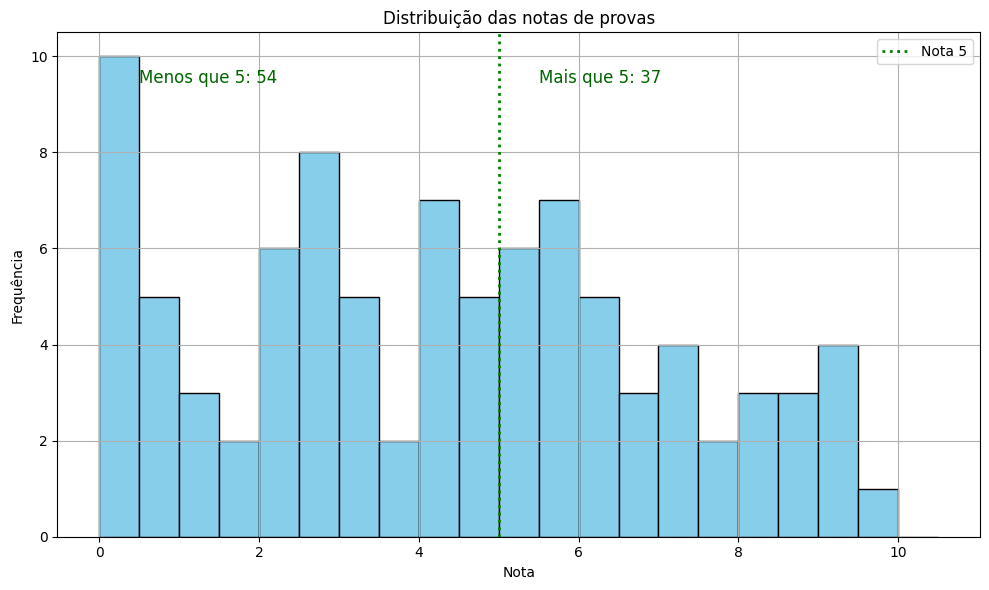

In [103]:
# Extraindo apenas o terceiro número de cada linha
notas_provas = []
for linha in text.strip().split("\n"):
    if linha.strip():
        # Encontra todos os números decimais na linha
        numeros = re.findall(r"\d+,\d+", linha)
        if len(numeros) >= 3:
            # Pega o terceiro número e converte para float
            nota_P = float(numeros[2].replace(",", "."))
            nota_P /= 2
            notas_provas.append(nota_P)

# Contando quantos alunos tiraram menos e mais do que 5
menos_que_5 = sum(nota <= 5 for nota in notas_provas)
mais_que_5 = sum(nota > 5 for nota in notas_provas)

# Replotando o gráfico com a linha no 4
plt.figure(figsize=(10, 6))
plt.hist(
    notas_provas, bins=list(np.arange(0, 11, 0.5)), edgecolor="black", color="skyblue"
)
plt.axvline(5, color="green", linestyle="dotted", linewidth=2, label="Nota 5")

# Adicionando os textos com as quantidades
plt.text(
    0.5,
    plt.ylim()[1] * 0.9,
    f"Menos que 5: {menos_que_5}",
    fontsize=12,
    color="darkgreen",
)
plt.text(
    5.5,
    plt.ylim()[1] * 0.9,
    f"Mais que 5: {mais_que_5}",
    fontsize=12,
    color="darkgreen",
)

plt.title("Distribuição das notas de provas")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

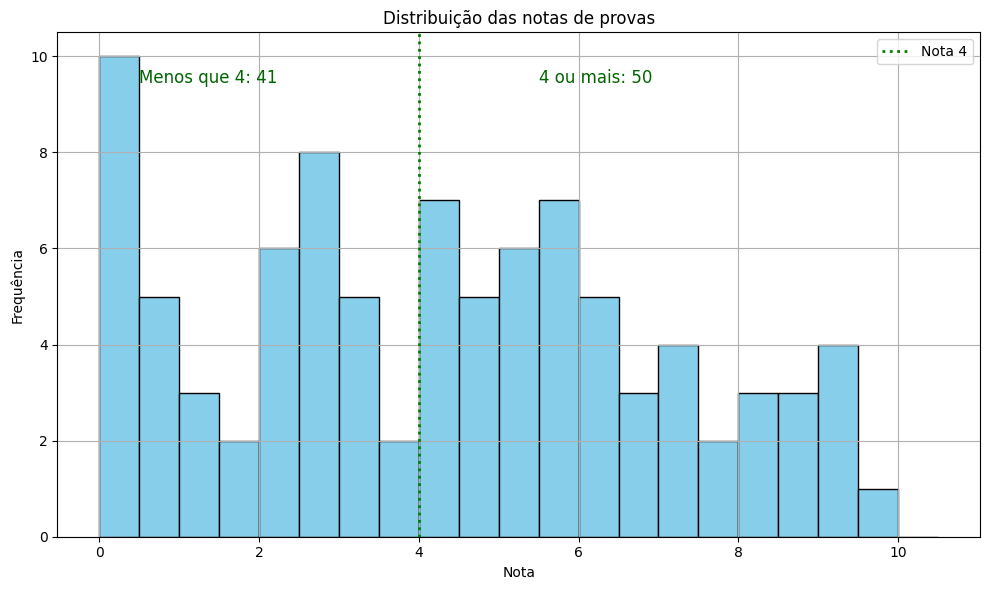

In [104]:
# Contando quantos alunos tiraram menos e mais do que 5
menos_que_4 = sum(nota < 4 for nota in notas_provas)
mais_que_4 = sum(nota >= 4 for nota in notas_provas)

# Replotando o gráfico com a linha no 4
plt.figure(figsize=(10, 6))
plt.hist(
    notas_provas, bins=list(np.arange(0, 11, 0.5)), edgecolor="black", color="skyblue"
)
plt.axvline(4, color="green", linestyle="dotted", linewidth=2, label="Nota 4")

# Adicionando os textos com as quantidades
plt.text(
    0.5,
    plt.ylim()[1] * 0.9,
    f"Menos que 4: {menos_que_4}",
    fontsize=12,
    color="darkgreen",
)
plt.text(
    5.5,
    plt.ylim()[1] * 0.9,
    f"4 ou mais: {mais_que_4}",
    fontsize=12,
    color="darkgreen",
)

plt.title("Distribuição das notas de provas")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

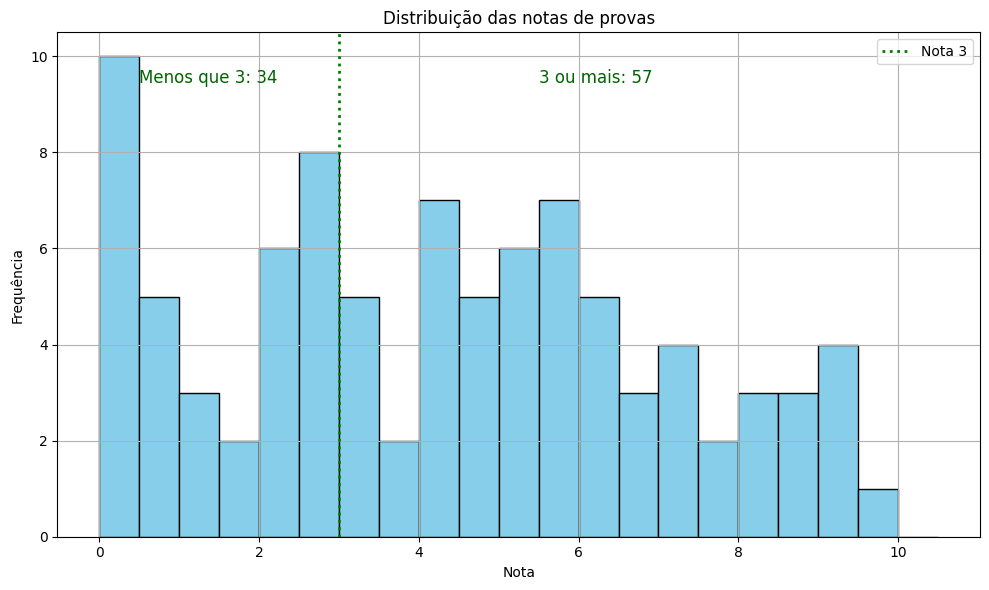

In [105]:
# Contando quantos alunos tiraram menos e mais do que 5
menos_que_3 = sum(nota < 3 for nota in notas_provas)
mais_que_3 = sum(nota >= 3 for nota in notas_provas)

# Replotando o gráfico com a linha no 3
plt.figure(figsize=(10, 6))
plt.hist(
    notas_provas, bins=list(np.arange(0, 11, 0.5)), edgecolor="black", color="skyblue"
)
plt.axvline(3, color="green", linestyle="dotted", linewidth=2, label="Nota 3")

# Adicionando os textos com as quantidades
plt.text(
    0.5,
    plt.ylim()[1] * 0.9,
    f"Menos que 3: {menos_que_3}",
    fontsize=12,
    color="darkgreen",
)
plt.text(
    5.5,
    plt.ylim()[1] * 0.9,
    f"3 ou mais: {mais_que_3}",
    fontsize=12,
    color="darkgreen",
)

plt.title("Distribuição das notas de provas")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
print(str(50 / 91) + " aprovados na primeira avaliacao")

0.5494505494505495 aprovados na primeira avaliacao


In [107]:
41 / 91

0.45054945054945056

In [111]:
print(str(34 / 91) + " reprovados na primeira avaliacao")

0.37362637362637363 reprovados na primeira avaliacao
